## 0. **EDA** (Data Analysis)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/USER/Desktop/World Happiness Report.csv")

df.columns

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

In [3]:
df

Country Name  Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0     Afghanistan          South Asia  2008     3.723590            7.350416   
1     Afghanistan          South Asia  2009     4.401778            7.508646   
2     Afghanistan          South Asia  2010     4.758381            7.613900   
3     Afghanistan          South Asia  2011     3.831719            7.581259   
4     Afghanistan          South Asia  2012     3.782938            7.660506   
...           ...                 ...   ...          ...                 ...   
2194     Zimbabwe  Sub-Saharan Africa  2018     3.616480            7.783066   
2195     Zimbabwe  Sub-Saharan Africa  2019     2.693523            7.697755   
2196     Zimbabwe  Sub-Saharan Africa  2020     3.159802            7.596050   
2197     Zimbabwe  Sub-Saharan Africa  2021     3.154578            7.656878   
2198     Zimbabwe  Sub-Saharan Africa  2022     3.296220            7.670123   

      Social Support  Healthy Life Expectancy At Birth  \
0           0.450662                         50.500000   
1           0.552308                         50.799999   
2           0.539075                         51.099998   
3           0.521104                         51.400002   
4           0.520637                         51.700001   
...              ...                               ...   
2194        0.775388                         52.625000   
2195        0.759162                         53.099998   
2196        0.717243                         53.575001   
2197        0.685151                         54.049999   
2198        0.666172                         54.525002   

      Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                         0.718114    0.167652                   0.881686   
1                         0.678896    0.190809                   0.850035   
2                         0.600127    0.121316                   0.706766   
3                         0.495901    0.163571                   0.731109   
4                         0.530935    0.237588                   0.775620   
...                            ...         ...                        ...   
2194                      0.762675   -0.051219                   0.844209   
2195                      0.631908   -0.047464                   0.830652   
2196                      0.643303    0.006313                   0.788523   
2197                      0.667636   -0.075575                   0.756945   
2198                      0.651987   -0.069513                   0.752632   

      Positive Affect  Negative Affect  Confidence In National Government  
0            0.414297         0.258195                           0.612072  
1            0.481421         0.237092                           0.611545  
2            0.516907         0.275324                           0.299357  
3            0.479835         0.267175                           0.307386  
4            0.613513         0.267919                           0.435440  
...               ...              ...                                ...  
2194         0.657524         0.211726                           0.550508  
2195         0.658434         0.235354                           0.456455  
2196         0.660658         0.345736                           0.577302  
2197         0.609917         0.241682                           0.665703  
2198         0.640609         0.191350                                NaN  

[2199 rows x 13 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2199 non-null   object 
 1   Regional Indicator                 2087 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life Ladder                        2199 non-null   float64
 4   Log GDP Per Capita                 2179 non-null   float64
 5   Social Support                     2186 non-null   float64
 6   Healthy Life Expectancy At Birth   2145 non-null   float64
 7   Freedom To Make Life Choices       2166 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions Of Corruption          2083 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

C:\Users\USER\AppData\Local\Temp\ipykernel_19100\1109974296.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Negative Affect', 'Confidence In National Government']].corr()


Text(0.5, 1.0, 'Heatmap for correlations between continuous features')

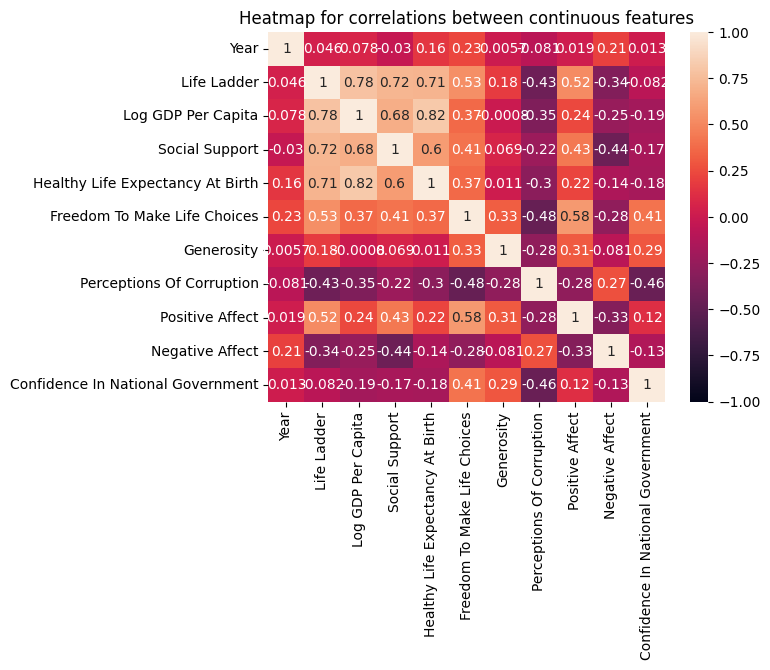

In [5]:
corr = df[['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government']].corr()

sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
plt.title('Heatmap for correlations between continuous features')

## 1. **Data Preprocessing** for Classification

In [6]:
# Drop not-common features of each datasets

df = df.drop(columns = ['Year','Perceptions Of Corruption', 'Negative Affect', 'Confidence In National Government'])


In [7]:
df.columns

Index(['Country Name', 'Regional Indicator', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Positive Affect'],
      dtype='object')

In [8]:
# Change feature's name of each datasets0

df.rename(columns={'Country Name':'Country', 'Regional Indicator':'Region', 'Life Ladder':'Score','Healthy Life Expectancy At Birth':'Health', 'Freedom To Make Life Choices':'Freedom'}, inplace=True)


In [9]:
df

Country              Region     Score  Log GDP Per Capita  \
0     Afghanistan          South Asia  3.723590            7.350416   
1     Afghanistan          South Asia  4.401778            7.508646   
2     Afghanistan          South Asia  4.758381            7.613900   
3     Afghanistan          South Asia  3.831719            7.581259   
4     Afghanistan          South Asia  3.782938            7.660506   
...           ...                 ...       ...                 ...   
2194     Zimbabwe  Sub-Saharan Africa  3.616480            7.783066   
2195     Zimbabwe  Sub-Saharan Africa  2.693523            7.697755   
2196     Zimbabwe  Sub-Saharan Africa  3.159802            7.596050   
2197     Zimbabwe  Sub-Saharan Africa  3.154578            7.656878   
2198     Zimbabwe  Sub-Saharan Africa  3.296220            7.670123   

      Social Support     Health   Freedom  Generosity  Positive Affect  
0           0.450662  50.500000  0.718114    0.167652         0.414297  
1           0.552308  50.799999  0.678896    0.190809         0.481421  
2           0.539075  51.099998  0.600127    0.121316         0.516907  
3           0.521104  51.400002  0.495901    0.163571         0.479835  
4           0.520637  51.700001  0.530935    0.237588         0.613513  
...              ...        ...       ...         ...              ...  
2194        0.775388  52.625000  0.762675   -0.051219         0.657524  
2195        0.759162  53.099998  0.631908   -0.047464         0.658434  
2196        0.717243  53.575001  0.643303    0.006313         0.660658  
2197        0.685151  54.049999  0.667636   -0.075575         0.609917  
2198        0.666172  54.525002  0.651987   -0.069513         0.640609  

[2199 rows x 9 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2199 non-null   object 
 1   Region              2087 non-null   object 
 2   Score               2199 non-null   float64
 3   Log GDP Per Capita  2179 non-null   float64
 4   Social Support      2186 non-null   float64
 5   Health              2145 non-null   float64
 6   Freedom             2166 non-null   float64
 7   Generosity          2126 non-null   float64
 8   Positive Affect     2175 non-null   float64
dtypes: float64(7), object(2)
memory usage: 154.7+ KB


### There are some NaN values in out data.

1. Region : **112** NaN value
2. Log GDP Per Capita : **20** NaN value
3. Social Support : **20** NaN value
4. Health : **54** NaN value
5. Freedom : **33** NaN value
6. Generosity : **73** NaN value
7. Positive Affect : **24** NaN value

In [11]:
# First, we need to remove object type features.

df.drop(['Country', 'Region'], axis=1, inplace=True)


In [12]:
df

Score  Log GDP Per Capita  Social Support     Health   Freedom  \
0     3.723590            7.350416        0.450662  50.500000  0.718114   
1     4.401778            7.508646        0.552308  50.799999  0.678896   
2     4.758381            7.613900        0.539075  51.099998  0.600127   
3     3.831719            7.581259        0.521104  51.400002  0.495901   
4     3.782938            7.660506        0.520637  51.700001  0.530935   
...        ...                 ...             ...        ...       ...   
2194  3.616480            7.783066        0.775388  52.625000  0.762675   
2195  2.693523            7.697755        0.759162  53.099998  0.631908   
2196  3.159802            7.596050        0.717243  53.575001  0.643303   
2197  3.154578            7.656878        0.685151  54.049999  0.667636   
2198  3.296220            7.670123        0.666172  54.525002  0.651987   

      Generosity  Positive Affect  
0       0.167652         0.414297  
1       0.190809         0.481421  
2       0.121316         0.516907  
3       0.163571         0.479835  
4       0.237588         0.613513  
...          ...              ...  
2194   -0.051219         0.657524  
2195   -0.047464         0.658434  
2196    0.006313         0.660658  
2197   -0.075575         0.609917  
2198   -0.069513         0.640609  

[2199 rows x 7 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Score               2199 non-null   float64
 1   Log GDP Per Capita  2179 non-null   float64
 2   Social Support      2186 non-null   float64
 3   Health              2145 non-null   float64
 4   Freedom             2166 non-null   float64
 5   Generosity          2126 non-null   float64
 6   Positive Affect     2175 non-null   float64
dtypes: float64(7)
memory usage: 120.4 KB


In [14]:
# We can find null at 7 features, and fill them without 'Log GDP Per Capita'.

df_GDP = df['Log GDP Per Capita']
df.drop(['Log GDP Per Capita'], axis=1, inplace=True)

# df.fillna(df.mean, inplace=True)  # Method can be replaced

df["Social Support"] = df["Social Support"].replace(np.NaN, df["Social Support"].mean())
df["Health"] = df["Health"].replace(np.NaN, df["Health"].mean())
df["Freedom"] = df["Freedom"].replace(np.NaN, df["Freedom"].mean())
df["Generosity"] = df["Generosity"].replace(np.NaN, df["Generosity"].mean())
df["Positive Affect"] = df["Positive Affect"].replace(np.NaN, df["Positive Affect"].mean())  # 국가 전년도 데이터의 평균을 사용해보는 방법 가능

df = pd.concat([df,df_GDP],axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Score               2199 non-null   float64
 1   Social Support      2199 non-null   float64
 2   Health              2199 non-null   float64
 3   Freedom             2199 non-null   float64
 4   Generosity          2199 non-null   float64
 5   Positive Affect     2199 non-null   float64
 6   Log GDP Per Capita  2179 non-null   float64
dtypes: float64(7)
memory usage: 120.4 KB


In [15]:
np.sum(pd.isnull(df))

Score                  0
Social Support         0
Health                 0
Freedom                0
Generosity             0
Positive Affect        0
Log GDP Per Capita    20
dtype: int64

In [16]:
# Preprocessing 'Log GDP Per Capita' for NaN

df_GDP_removed = df.loc[df['Log GDP Per Capita'].isna()]
df.dropna(inplace=True)

df_GDP_removed

Score  Social Support     Health   Freedom  Generosity  \
13    1.281271        0.228217  54.875000  0.368377    0.000096   
475   5.417869        0.969595  68.000000  0.281458    0.000096   
490   5.864757        0.819547  73.000000  0.698407    0.000096   
1031  5.103906        0.847812  63.294583  0.381364    0.000096   
1237  6.299238        0.932083  71.650002  0.837544    0.000096   
1755  4.991400        0.879567  63.294583  0.746304    0.000096   
1756  4.657363        0.829005  63.294583  0.820182    0.000096   
1757  4.930572        0.787962  63.294583  0.858104    0.000096   
1758  5.057314        0.786291  63.294583  0.758219    0.000096   
1792  3.831992        0.545118  52.880001  0.567259    0.000096   
1793  4.070771        0.584781  53.000000  0.511631    0.000096   
1794  2.888112        0.532152  53.174999  0.439919    0.000096   
1795  2.816622        0.556823  53.349998  0.456011    0.000096   
1842  4.907760        0.859655  63.294583  0.694853    0.000096   
1897  6.751068        0.900833  63.294583  0.798835    0.000096   
1898  6.246744        0.866298  63.294583  0.818467    0.000096   
1899  6.607147        0.882820  63.294583  0.800192    0.000096   
2135  4.573830        0.805224  64.224998  0.611815    0.000096   
2136  5.107553        0.812418  64.050003  0.595620    0.000096   
2137  5.948992        0.899366  63.875000  0.770417    0.000096   

      Positive Affect  Log GDP Per Capita  
13           0.205868                 NaN  
475          0.596187                 NaN  
490          0.659326                 NaN  
1031         0.613723                 NaN  
1237         0.671104                 NaN  
1755         0.707874                 NaN  
1756         0.631947                 NaN  
1757         0.690514                 NaN  
1758         0.686732                 NaN  
1792         0.578410                 NaN  
1793         0.552726                 NaN  
1794         0.593741                 NaN  
1795         0.564999                 NaN  
1842         0.584111                 NaN  
1897         0.743169                 NaN  
1898         0.667417                 NaN  
1899         0.716587                 NaN  
2135         0.689349                 NaN  
2136         0.697587                 NaN  
2137         0.754337                 NaN

In [17]:
# Preprocessing 'Log GDP Per Capita' for NaN (2)

df['GDP per Capita(Dollar)'] = np.exp(df['Log GDP Per Capita'])

df['Income Level'] = np.where(df['GDP per Capita(Dollar)'] >= 12475.5, 1, 0)

In [18]:
df.drop(['Log GDP Per Capita', 'GDP per Capita(Dollar)'], axis=1, inplace=True)

In [19]:
df.head(50)

Score  Social Support     Health   Freedom  Generosity  \
0   3.723590        0.450662  50.500000  0.718114    0.167652   
1   4.401778        0.552308  50.799999  0.678896    0.190809   
2   4.758381        0.539075  51.099998  0.600127    0.121316   
3   3.831719        0.521104  51.400002  0.495901    0.163571   
4   3.782938        0.520637  51.700001  0.530935    0.237588   
5   3.572100        0.483552  52.000000  0.577955    0.062666   
6   3.130896        0.525568  52.299999  0.508514    0.105755   
7   3.982855        0.528597  52.599998  0.388928    0.081652   
8   4.220169        0.559072  52.924999  0.522566    0.043916   
9   2.661718        0.490880  53.250000  0.427011   -0.119410   
10  2.694303        0.507516  53.575001  0.373536   -0.091106   
11  2.375092        0.419973  53.900002  0.393656   -0.106016   
12  2.436034        0.454175  54.549999  0.394306   -0.081011   
14  4.634252        0.821372  66.760002  0.528605   -0.010429   
15  5.485470        0.833047  67.320000  0.525223   -0.159259   
16  5.268937        0.733152  67.599998  0.568958   -0.173675   
17  5.867422        0.759434  67.879997  0.487496   -0.206186   
18  5.510124        0.784502  68.160004  0.601512   -0.170467   
19  4.550648        0.759477  68.440002  0.631830   -0.128825   
20  4.813763        0.625587  68.720001  0.734648   -0.026298   
21  4.606651        0.639356  69.000000  0.703851   -0.082492   
22  4.511101        0.638411  69.025002  0.729819   -0.018664   
23  4.639548        0.637698  69.050003  0.749611   -0.030506   
24  5.004403        0.683592  69.074997  0.824212    0.007197   
25  4.995318        0.686365  69.099998  0.777351   -0.100910   
26  5.364910        0.710115  69.125000  0.753671    0.004123   
27  5.255482        0.701883  69.150002  0.827453    0.041378   
28  5.212213        0.724090  69.175003  0.802250   -0.065987   
29  5.463567        0.810679  65.500000  0.592696   -0.209753   
30  5.317194        0.810234  65.599998  0.529561   -0.185084   
31  5.604596        0.839397  65.699997  0.586663   -0.176571   
32  6.354898        0.818189  65.900002  0.747858    0.000096   
33  5.340854        0.748588  66.099998  0.747858    0.000096   
34  5.248912        0.806754  66.199997  0.436670   -0.171471   
35  5.043086        0.798651  66.300003  0.583381   -0.150559   
36  4.744627        0.803259  66.400002  0.385083    0.000268   
37  5.437755        0.867649  66.500000  0.573891   -0.121148   
38  5.217018        0.840710  66.599998  0.558487   -0.113483   
39  5.589001        0.723094  51.220001  0.583702    0.052619   
40  4.360250        0.752593  51.840000  0.456029   -0.138630   
41  3.937107        0.721591  52.459999  0.409555   -0.105992   
42  3.794838        0.754615  53.080002  0.374542   -0.170031   
43  6.312925        0.938463  65.820000  0.733004   -0.159916   
44  6.073158        0.862206  65.940002  0.652833   -0.144077   
45  5.961034        0.892195  66.059998  0.678222   -0.134858   
46  6.424133        0.918693  66.180000  0.636646   -0.132990   
47  6.441067        0.926799  66.300003  0.730258   -0.129371   
48  6.775805        0.889073  66.419998  0.815802   -0.177722   
49  6.468387        0.901776  66.540001  0.747498   -0.151320   
50  6.582260        0.909874  66.660004  0.737250   -0.133839   

    Positive Affect  Income Level  
0          0.414297             0  
1          0.481421             0  
2          0.516907             0  
3          0.479835             0  
4          0.613513             0  
5          0.547417             0  
6          0.491641             0  
7          0.491410             0  
8          0.501409             0  
9          0.435270             0  
10         0.384561             0  
11         0.324108             0  
12         0.178886             0  
14         0.488819             0  
15         0.564474             0  
16         0.576077             0  
17         0.565759             0  
18         0.553473             0  
19     

In [20]:
df.reset_index(drop=True, inplace=True)

In [21]:
df['Income Level'].value_counts()

1    1141
0    1038
Name: Income Level, dtype: int64

## 2. **Data Split** and **Manifold Learning**

#### 2-1. **Data Split**

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [23]:
# Load scikit-learn package we need.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Seperate Train/Test set.

X = np.array(df[['Score','Social Support','Health','Freedom','Generosity','Positive Affect']])
y = df['Income Level']

# Split the data into trainset and testset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

#### 2-2. **Manifold Learning**

In [25]:
# PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
import mglearn

# Build a PCA model and reduce the dimensionality into 2. (You can change the number of dimension as you want.)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Build a Kernel PCA model and reduce the dimensionality into 2, using rbf kernel.
kpca_poly = KernelPCA(kernel='poly', gamma=0.1, n_components=2)
kpca_rbf = KernelPCA(kernel='rbf', gamma=0.5, n_components=2)
kpca_sigmoid = KernelPCA(kernel='sigmoid', gamma=0.01, n_components=2)

X_kpca_poly = kpca_poly.fit_transform(X)
X_kpca_rbf = kpca_rbf.fit_transform(X)
X_kpca_sigmoid = kpca_sigmoid.fit_transform(X)

In [26]:
print("원본 데이터 형태 : {}".format(str(X.shape)))
print("축소된 데이터 형태 : {}".format(str(X_reduced.shape)))

원본 데이터 형태 : (2179, 6)
축소된 데이터 형태 : (2179, 2)


First, we think that **PCA** does not necessary because there's uncomplicated features than number of data, so we don't worry about curse of dimensionality. 

But as we know, relation of each feature quite strong, so we must solve '**multicollinearity**', and PCA can reduce it. 

Additionally it helps to improve our computing cost and easy to visualization.

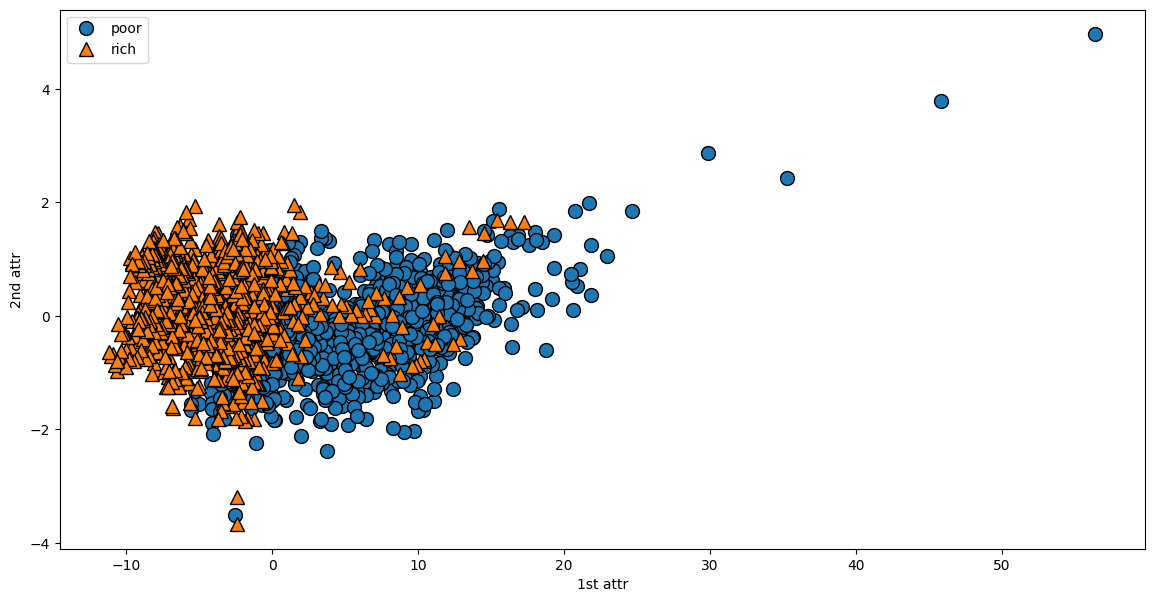

In [27]:
plt.figure(figsize=(14,7))

mglearn.discrete_scatter(X_reduced[:,0],X_reduced[:,1],y)
plt.legend(["poor","rich"],loc="best")

plt.xlabel("1st attr")
plt.ylabel("2nd attr")
plt.show()

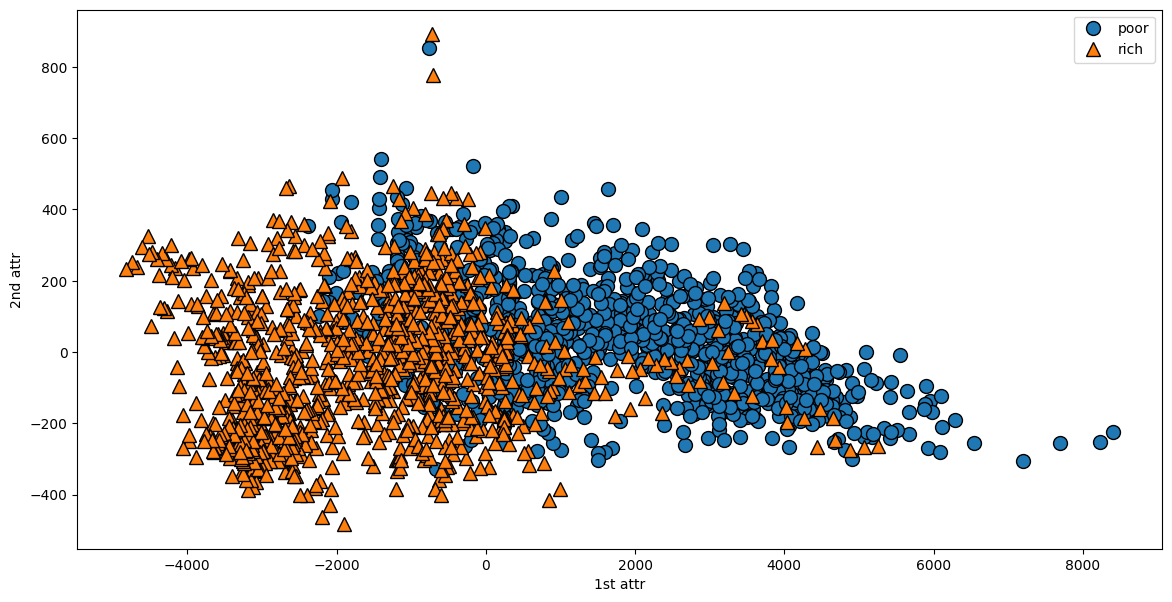

In [28]:
plt.figure(figsize=(14,7))

mglearn.discrete_scatter(X_kpca_poly[:,0],X_kpca_poly[:,1],y)
plt.legend(["poor","rich"],loc="best")

plt.xlabel("1st attr")
plt.ylabel("2nd attr")
plt.show()

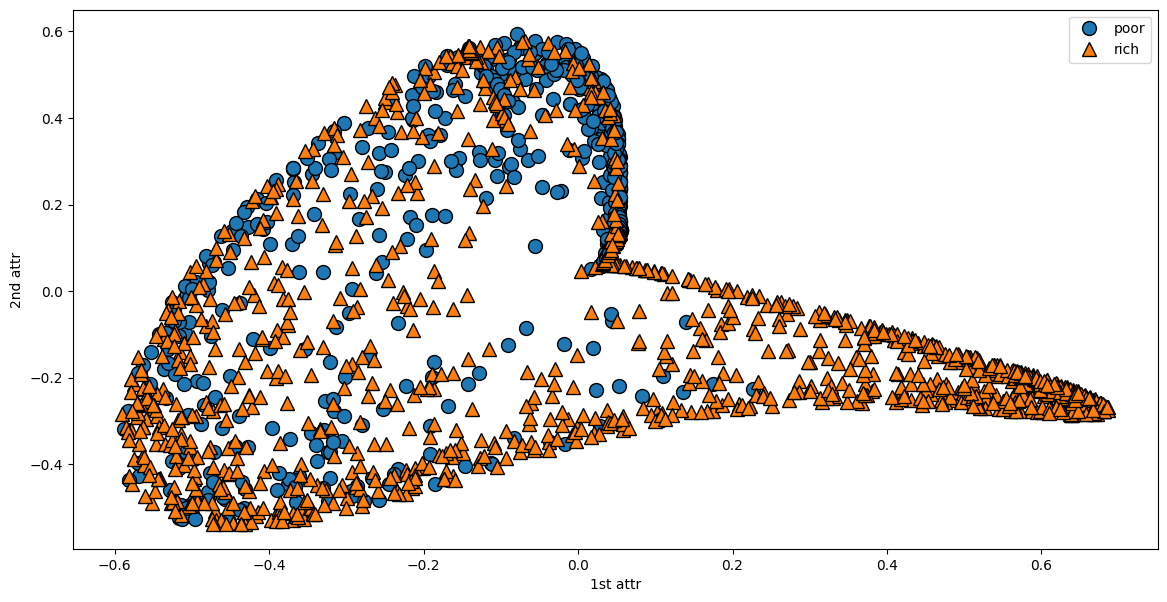

In [29]:
plt.figure(figsize=(14,7))

mglearn.discrete_scatter(X_kpca_rbf[:,0],X_kpca_rbf[:,1],y)
plt.legend(["poor","rich"],loc="best")

plt.xlabel("1st attr")
plt.ylabel("2nd attr")
plt.show()

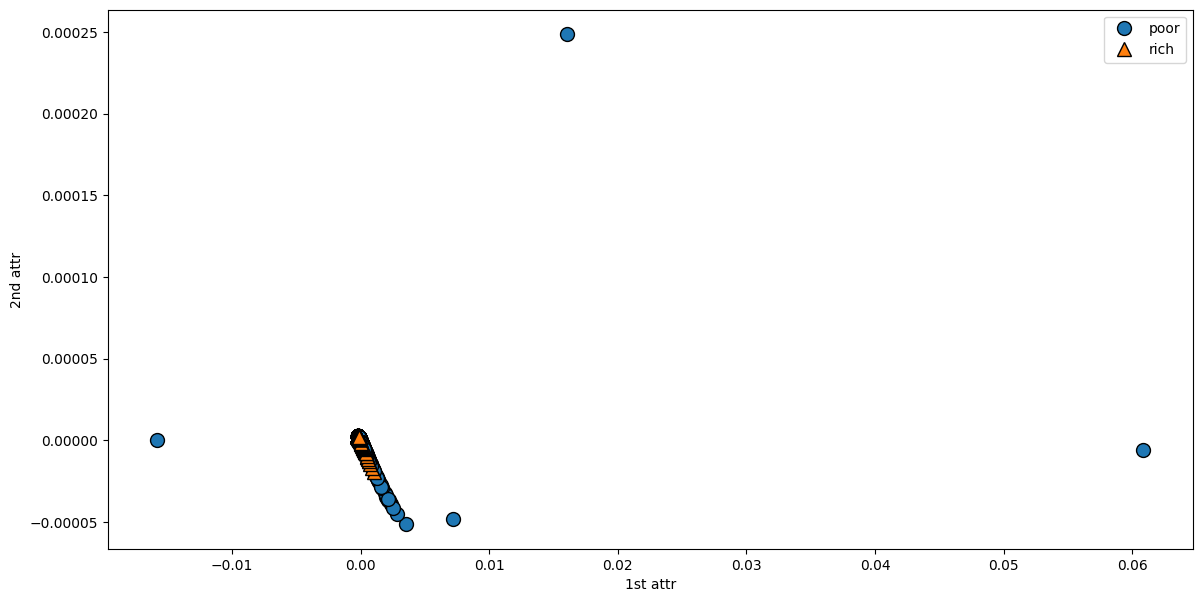

In [30]:
plt.figure(figsize=(14,7))

mglearn.discrete_scatter(X_kpca_sigmoid[:,0],X_kpca_sigmoid[:,1],y)
plt.legend(["poor","rich"],loc="best")

plt.xlabel("1st attr")
plt.ylabel("2nd attr")
plt.show()

In [31]:
#Manifold Learning
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.manifold import SpectralEmbedding

# Build a Isomap model and reduce the dimensionality into 2.
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

# Build a MDS model and reduce the dimensionality into 2.mds = MDS(n_components=2)
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


 ISOMAP helps dimension reduction to use distance info. which is actual characteristic between two data.

 MDS preserve distance of data at low-dimensional space.

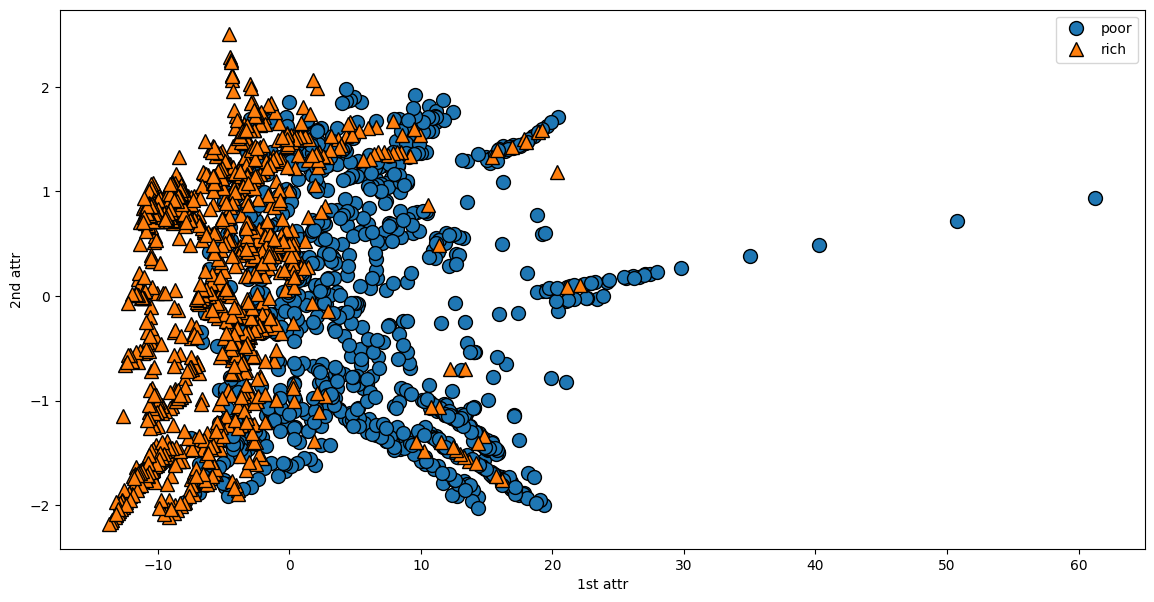

In [32]:
plt.figure(figsize=(14,7))

mglearn.discrete_scatter(X_isomap[:,0],X_isomap[:,1],y)
plt.legend(["poor","rich"],loc="best")

plt.xlabel("1st attr")
plt.ylabel("2nd attr")
plt.show()

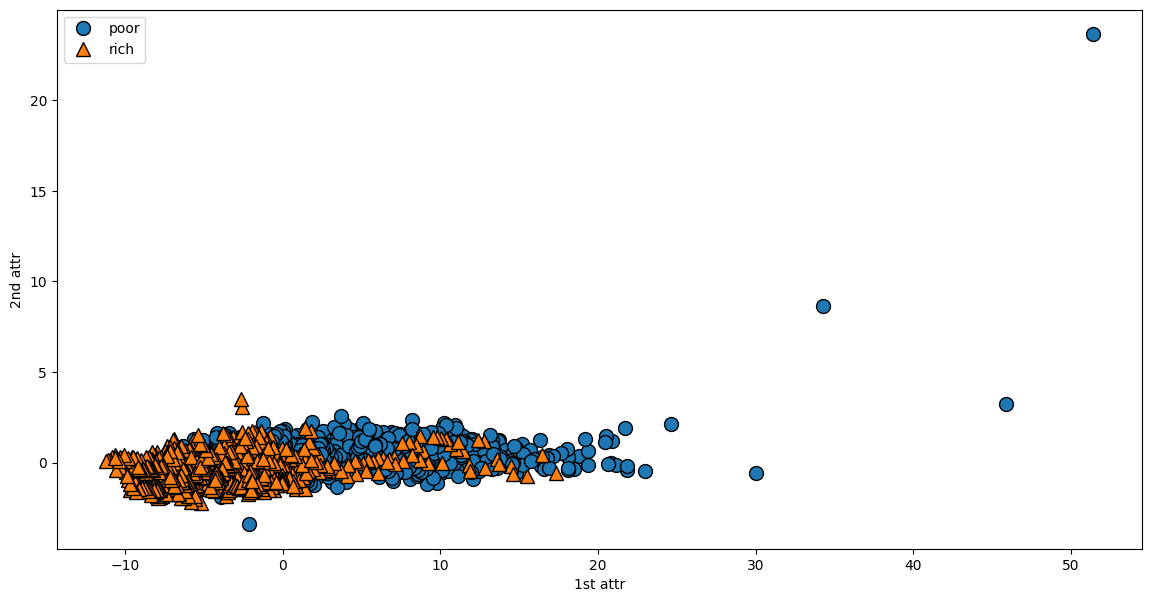

In [33]:
plt.figure(figsize=(14,7))

mglearn.discrete_scatter(X_mds[:,0],X_mds[:,1],y)
plt.legend(["poor","rich"],loc="best")

plt.xlabel("1st attr")
plt.ylabel("2nd attr")
plt.show()

For above results, we will use **X_reduced**, **X_kpca_poly** and **X_isomap** for our project, these are quietly fit to classification model.

## 3. **Modeling** for Classification and **Evaluation**

#### 3-1. **Overall**

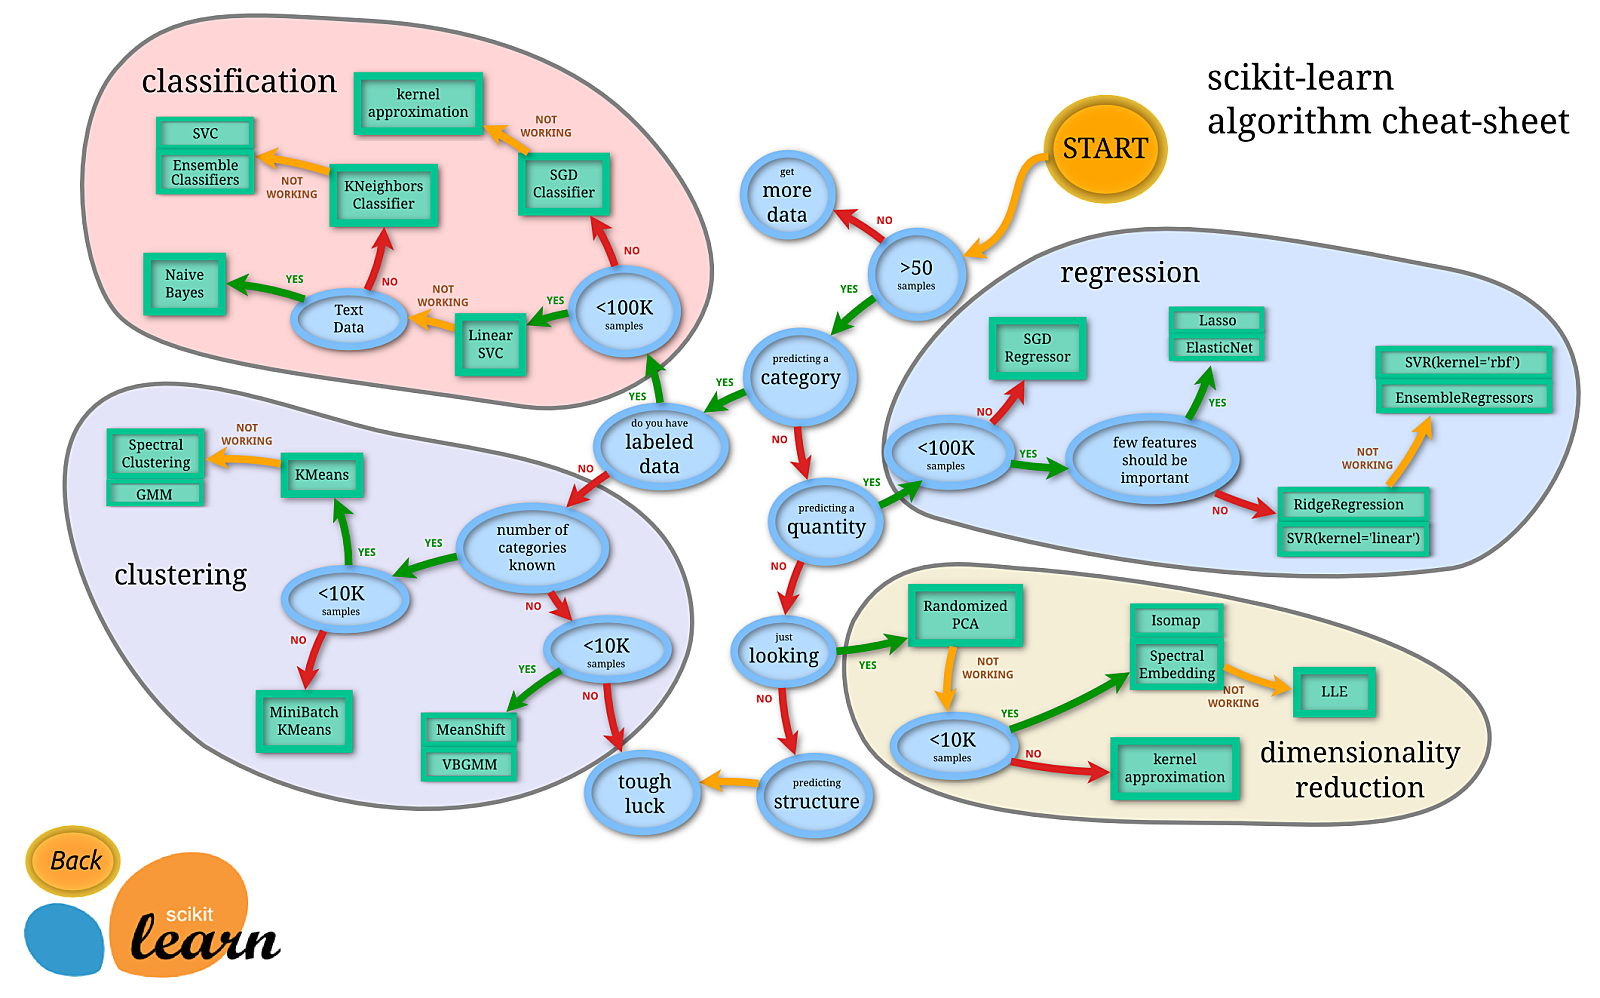

#### **3-2. Logistic Regression**

Reason for eliminate : It print 'Probability' of belonging to each class, and it'll be big pros. that using this model. But, it is just pros. and there's not any other reason to use this for this project. So, we fit this model just check just in case.

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
list_lr = list()

kf_LR = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
list_kfold = list()
for train_index, test_index in kf_LR.split(X,y):
    list_kfold.append((np.array(train_index), np.array(test_index)))

for train_index,test_index in list_kfold:
    xtr,xvl = X[train_index],X[test_index]
    ytr,yvl = y[train_index],y[test_index]
    lr = LogisticRegression()
    lr.fit(xtr,ytr)
    list_lr.append(lr)
    
# DO NOT MODIFY THIS CODE
list_lr

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

#### **3-3. Naive Bayes Classifier**

Reason for eliminate : Naive Bayes usually using at classifier which classifying text-based attributes, and it perform nice. But our data consists of numerical data, so i think it is not suitable for our project.

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:

kf_GNB = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

list_kfold = list()
for train_index, test_index in kf_GNB.split(X,y):
    list_kfold.append((np.array(train_index), np.array(test_index)))

list_nb = list()
# WRITE YOUR CODE BELOW
for train_index, test_index in list_kfold:
    x_train, x_valid = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    
    model = GaussianNB()
    model.fit(x_train, y_train)

    list_nb.append(model)


# DO NOT MODIFY THIS CODE
list_nb

[GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB()]

#### **3-4. KNN(K-nearest neighbor)**

Reason for Choosing : Although it shows computing skill to fall behind and high capacity of memory but as we do dimension reduction, so i think improved a little bit. And KNN perform high accuracy and error doesn't affect to result, so KNN can be candidate model for our project.

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Split the data into trainset and testset.
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.2, random_state=30)

**Hyperparameter**

1. Data = [X, X_reduce, X_kpca_poly, X_isomap]
2. p = 1(Manhattan) or p = 2(Euclidean)
3. n_neighbors : 1~50
4. weights = 'distance' or 'uniform'

In [26]:
# KNN with Cross-Validation

params = {'p' : [1,2],
          'n_neighbors' : [i for i in range(1,51)],
          'weights' : ['uniform','distance']
          }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
knn_clf = KNeighborsClassifier()
grid_cv_knn = GridSearchCV(knn_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv_knn.fit(X_train_knn, y_train_knn)

print('최적 하이퍼 파라미터: ', grid_cv_knn.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_knn.best_score_))

최적 하이퍼 파라미터:  {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
최고 예측 정확도: 0.8818


The Best Model : {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'} with acc.=0.8818

In [27]:
knn_clf1 = KNeighborsClassifier(n_neighbors=5, p=1, weights='uniform', n_jobs=-1)
knn_clf1.fit(X_train_knn, y_train_knn)
pred_knn = knn_clf1.predict(X_test_knn)

Model **Evaluation**

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test_knn,pred_knn)))

예측 정확도: 0.8739


In [30]:
print("Classification Report:")
print(classification_report(y_test_knn, pred_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test_knn, pred_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       202
           1       0.88      0.88      0.88       234

    accuracy                           0.87       436
   macro avg       0.87      0.87      0.87       436
weighted avg       0.87      0.87      0.87       436

Confusion Matrix:
[[175  27]
 [ 28 206]]


AUC : 0.8733392570026233


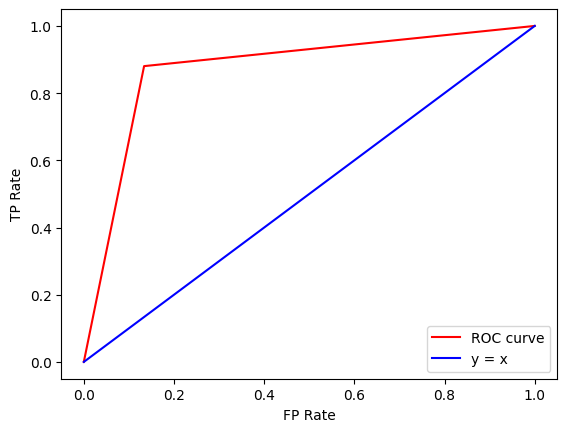

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('AUC :',roc_auc_score(y_test_knn, pred_knn))

fpr, tpr, thresholds = roc_curve(y_test_knn, pred_knn)
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x')

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.legend()

plt.show()

#### **3-5. Discriminant Analysis (Fisher's LDA, Gaussian DA)**

Reason for eliminate : LDA is popular and effective for supervised dimensionality reduction. But LDA suffers from singularity problem, assumes Gaussian distribution and covariance, and cannot determine optimal dimensionality.

In [46]:
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [47]:
X_train_da, X_test_da, y_train_da, y_test_da = train_test_split(X, y, test_size=0.2, random_state=30)


(1743, 1) (436, 1)


Text(0.5, 1.0, 'test data')

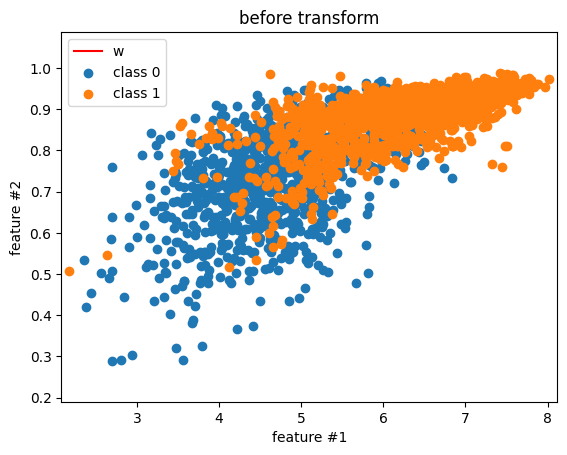

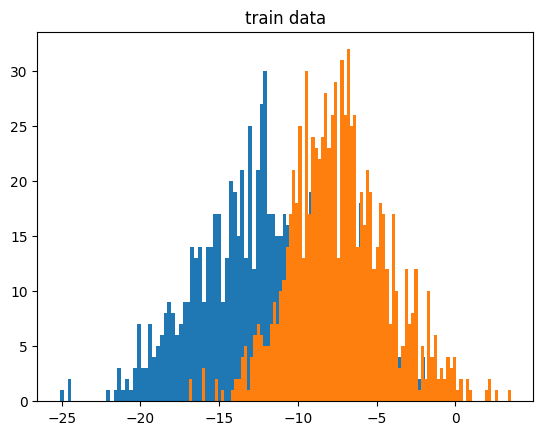

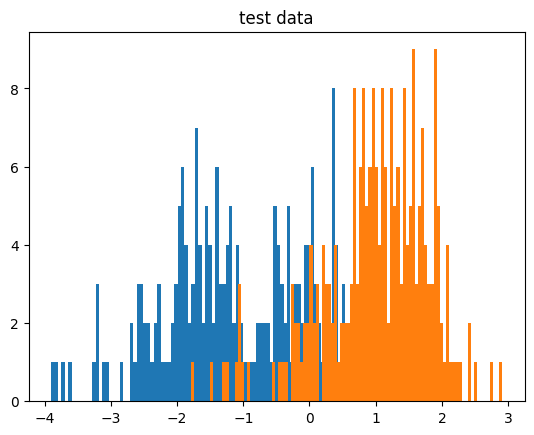

In [48]:
# standardization
scaler = StandardScaler()
scaler.fit(X_train_da)
train_scaled = scaler.transform(X_train_da)
test_scaled = scaler.transform(X_test_da)

# LDA
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_da, y_train_da)
train_lda = clf.transform(train_scaled)
test_lda = clf.transform(X_test_da)

# dimension of lda output (reduced to 1 dim.)
print(train_lda.shape, test_lda.shape)

# visualization
slope = clf.coef_[0,1] / clf.coef_[0,0]
t = np.arange(np.min(X[:,0]), np.max(X[:,0]), 0.1)

label0 = y==0
label1 = y==1
# plt.subplot(1,3,1)
plt.plot(t, slope*t, color='red')
plt.scatter(X[label0,0], X[label0,1])
plt.scatter(X[label1,0], X[label1,1])
plt.xlim(np.min(X[:,0])-0.1, np.max(X[:,0])+0.1)
plt.ylim(np.min(X[:,1])-0.1, np.max(X[:,1])+0.1)
plt.xlabel('feature #1')
plt.ylabel('feature #2')
plt.legend(labels=['w', 'class 0', 'class 1'])
plt.title('before transform')

plt.figure()
plt.hist(train_lda[y_train_da==0], 100)
plt.hist(train_lda[y_train_da==1], 100)
plt.title('train data')

plt.figure()
plt.hist(test_lda[y_test_da==0], 100)
plt.hist(test_lda[y_test_da==1], 100)
plt.title('test data')

#### **3-6. Decision Tree**

Reason for eliminate : Easy for visualization and it is not dependent on data scale. So other scaling(normalization, standardization) not necessary. But, it's not much help and there's more big problem. DecisionTree usually overfitting and sensitive to new sample. So, it is not suitable for our purpose and we just using this to know how this machine-learning model decide choosing.

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
# Decision Tree


# Build Decision Tree model and train it.
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Evaluation
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree:", accuracy)

Accuracy of Decision Tree: 0.8784403669724771


In [59]:
# DecisionTree with K-fold


kf_dt = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 50)
accuracy_history = []

# K-fold 검증 과정으로 실제 랜덤 포레스트 모델을 학습하여 정확도 평균을 내는 방법
for train_index, test_index in kf_dt.split(X,y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = DecisionTreeClassifier(min_samples_split=2) # 모델 선언
    model.fit(X_train, y_train) # 모델 학습

    y_pred = model.predict(X_test) # 예측 라벨
    accuracy_history.append(accuracy_score(y_pred, y_test)) # 정확도 측정 및 기록

print("Accuracy for Cross-validation :", accuracy_history)
print("Accuracy of Random Forest(Avr) :", np.mean(accuracy_history))

Accuracy for Cross-validation : [0.8738532110091743, 0.8509174311926605, 0.908256880733945, 0.8509174311926605, 0.8942528735632184]
Accuracy of Random Forest(Avr) : 0.8756395655383317


In [60]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#### **3-7. Random Forest**

Reason for Choosing : Strong against overfitting, outliers, and missing values. And it does not require a normalization process and performs well for non-linear data. Also it can handle numerical data. But it takes a lot of learning time and computation but if we do dimension reduction, however i think we can reduce these problem little more. So Random Forest also our Candidate model.

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Split the data into trainset and testset.
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=30)

In [34]:
# RandomForest


# Build Random Forest and train it.
random_forest = RandomForestClassifier(n_estimators=100, random_state=40)
random_forest.fit(X_train_rf, y_train_rf)

# Evaluation
y_pred = random_forest.predict(X_test_rf)
accuracy = accuracy_score(y_test_rf, y_pred)
print("Accuracy of Random Forest:", accuracy)

Accuracy of Random Forest: 0.9151376146788991


**Hyperparameters**

1. n_estimators - Specifies the number of decision trees
2. min_samples_split - Minimum number of sample data for splitting nodes
3. min_samples_leaf - Minimum number of sample data required to be a leaf node
4. max_features - Maximum number of features to consider for optimal segmentation
5. max_depth - maximum depth of the tree
6. Maximum number of max_leaf_nodes leaf nodes

In [64]:
# RandomForest with K-fold


params = { 'n_estimators' : [1, 5, 10, 50, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 13, 18],
           'min_samples_split' : [8, 12, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv_rf = GridSearchCV(rf_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv_rf.fit(X_train_rf, y_train_rf)

print('최적 하이퍼 파라미터: ', grid_cv_rf.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_rf.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.8904


The Best Model : {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100} with acc.=0.8904

In [35]:
rf_clf1 = RandomForestClassifier(n_estimators = 100, max_depth = 8, min_samples_leaf = 8, min_samples_split = 8, random_state = 0, n_jobs = -1)
rf_clf1.fit(X_train_rf, y_train_rf)
pred_rf = rf_clf1.predict(X_test_rf)

Model **Evaluation**

In [36]:
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test_rf,pred_rf)))

예측 정확도: 0.8991


In [37]:
print("Classification Report:")
print(classification_report(y_test_rf, pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test_rf, pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       202
           1       0.89      0.92      0.91       234

    accuracy                           0.90       436
   macro avg       0.90      0.90      0.90       436
weighted avg       0.90      0.90      0.90       436

Confusion Matrix:
[[176  26]
 [ 18 216]]


AUC : 0.8971820258948973


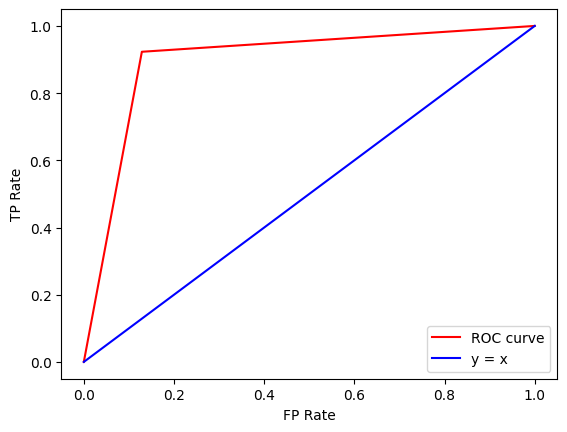

In [38]:
print('AUC :',roc_auc_score(y_test_rf, pred_rf))

fpr, tpr, thresholds = roc_curve(y_test_rf, pred_rf)
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x')

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.legend()

plt.show()

#### **3-8. SVM (Support Vector Machine) : Linear, Soft-margin, Kernel**

Reason for Choosing : Use to deal with classification issues that require accuracy because the accuracy is quite good if the kernel is chosen appropriately. So if we find appropriate kernel for our data, i think it'll be the best model out of candidate model.

In [39]:
from sklearn.svm import SVC

In [40]:
# Split the data into trainset and testset.
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.2, random_state=30)

In [41]:
# Soft-margin Linear SVM


soft_margin_svm = SVC(kernel='linear', C=1.0)  # C를 조절하여 마진을 조절할 수 있습니다.
soft_margin_svm.fit(X_train_svm, y_train_svm)

# 테스트 세트를 사용하여 모델의 성능을 평가합니다.
y_pred_svm0 = soft_margin_svm.predict(X_test_svm)
accuracy_svm0 = accuracy_score(y_test_svm, y_pred_svm0)
print("Accuracy of Soft Margin SVM:", accuracy_svm0)

Accuracy of Soft Margin SVM: 0.8463302752293578


In [71]:
# Soft-margin kernel SVM with K-fold validation


params = { 'kernel' : ['linear', 'rbf', 'sigmoid'],
          'C' : [1, 5, 10, 30, 50, 100, 300, 500, 1000, 5000, 10000],
          'gamma' : [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 5.0, 10.0]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
svm_clf = SVC()
grid_cv_svm = GridSearchCV(svm_clf, param_grid=params, cv=5, verbose=2, n_jobs=-1)
grid_cv_svm.fit(X_train_svm, y_train_svm)

print('최적 하이퍼 파라미터: ', grid_cv_svm.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_svm.best_score_))

Fitting 5 folds for each of 264 candidates, totalling 1320 fits
최적 하이퍼 파라미터:  {'C': 50, 'gamma': 1.0, 'kernel': 'rbf'}
최고 예측 정확도: 0.9048


In [ ]:
params = { 'kernel' : ['poly'],
          'C' : [1, 500, 1000],
          'gamma' : [0.1, 1.0, 10.0],
          'degree' : [3]
          }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
svm_clf = SVC()
grid_cv_svm = GridSearchCV(svm_clf, param_grid=params, cv=3, verbose=2, n_jobs=-1)
grid_cv_svm.fit(X_train_svm, y_train_svm)

print('최적 하이퍼 파라미터: ', grid_cv_svm.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv_svm.best_score_))

The Best Model : {'C': 50, 'gamma': 1.0, 'kernel': 'rbf'} with acc.=0.9048

In [42]:
svm_clf1 = SVC(C=50, gamma=1, kernel='rbf')
svm_clf1.fit(X_train_svm, y_train_svm)
pred_svm = svm_clf1.predict(X_test_svm)

Model **Evaluation**

In [43]:
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test_svm, pred_svm)))

예측 정확도: 0.8991


In [44]:
print("Classification Report:")
print(classification_report(y_test_svm, pred_svm))

print("Confusion Matrix:")
print(confusion_matrix(y_test_svm, pred_svm))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       202
           1       0.91      0.90      0.91       234

    accuracy                           0.90       436
   macro avg       0.90      0.90      0.90       436
weighted avg       0.90      0.90      0.90       436

Confusion Matrix:
[[181  21]
 [ 23 211]]


AUC : 0.8988745028348989


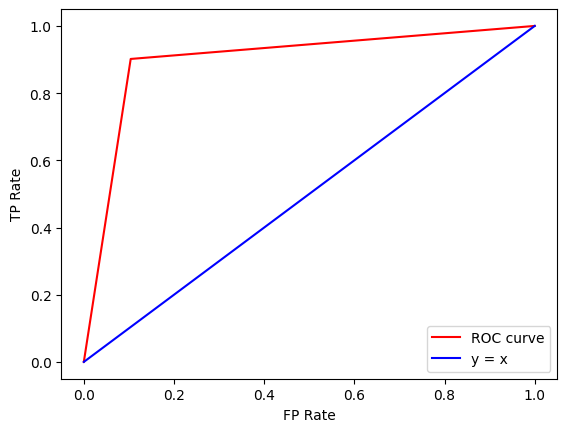

In [45]:
print('AUC :',roc_auc_score(y_test_svm, pred_svm))

fpr, tpr, thresholds = roc_curve(y_test_svm, pred_svm)
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve')
plt.plot([0, 1], [0, 1], color = 'blue', label = 'y = x')

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.legend()

plt.show()

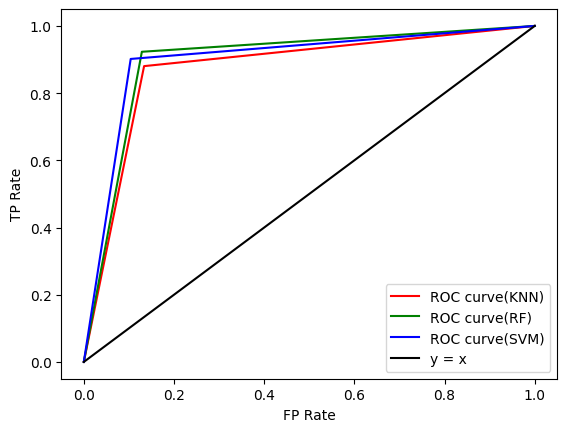

In [88]:
fpr1, tpr1, thresholds1 = roc_curve(y_test_knn, pred_knn)
fpr2, tpr2, thresholds2 = roc_curve(y_test_rf, pred_rf)
fpr3, tpr3, thresholds3 = roc_curve(y_test_svm, pred_svm)

plt.plot(fpr1, tpr1, color = 'red', label = 'ROC curve(KNN)')
plt.plot(fpr2, tpr2, color = 'green', label = 'ROC curve(RF)')
plt.plot(fpr3, tpr3, color = 'blue', label = 'ROC curve(SVM)')
plt.plot([0, 1], [0, 1], color = 'black', label = 'y = x')

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.legend()

plt.show()